<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [3]:
bubble_data = df[['Age', 'SOPartFreq', 'JobSat']].dropna()
bubble_data

Age                           SOPartFreq  JobSat
10     35-44 years old  Less than once per month or monthly     8.0
12     35-44 years old                 A few times per week     8.0
15     45-54 years old      A few times per month or weekly     5.0
18     25-34 years old                 A few times per week    10.0
20     25-34 years old  Less than once per month or monthly     6.0
...                ...                                  ...     ...
65166  25-34 years old  Less than once per month or monthly     8.0
65178  45-54 years old      A few times per month or weekly     8.0
65241  25-34 years old  Less than once per month or monthly     5.0
65265  18-24 years old  Less than once per month or monthly     8.0
65351  25-34 years old  Less than once per month or monthly     8.0

[23388 rows x 3 columns]

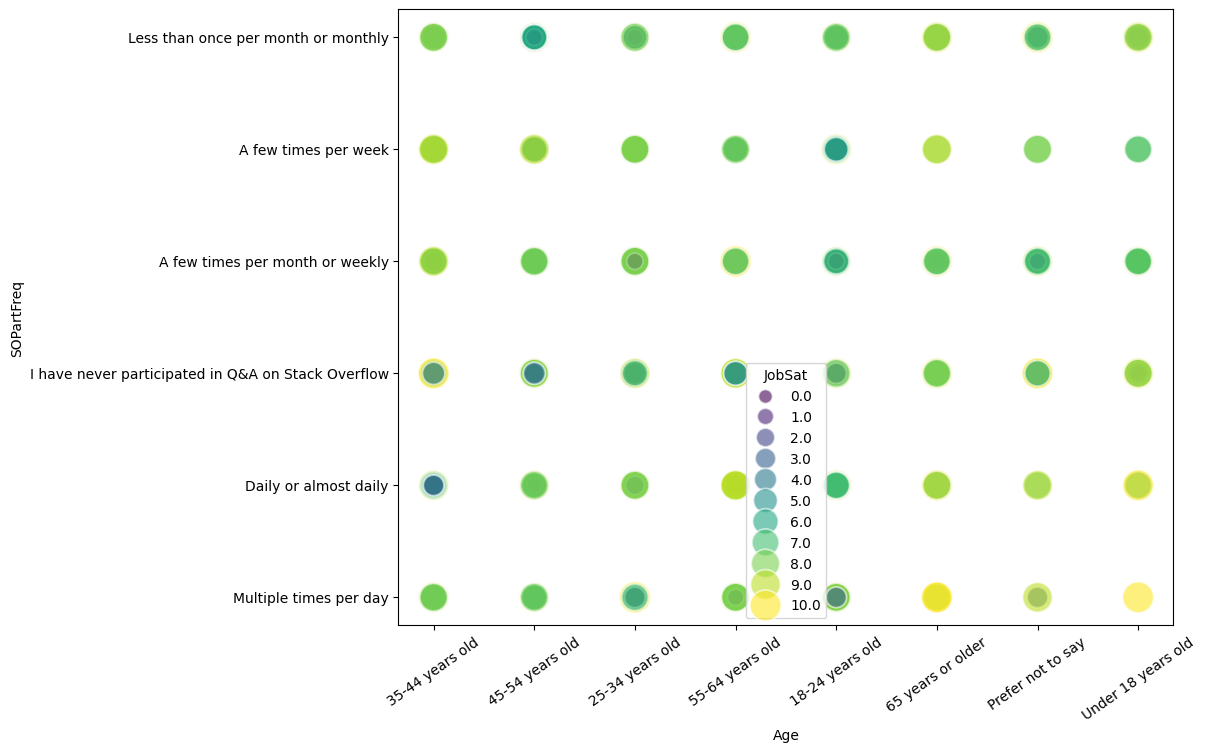

In [4]:
plt.figure(figsize=(10,8))
# plt.scatter(bubble_data['Age'], 
#             bubble_data['SOPartFreq'], 
#             s=bubble_data['JobSat'] * 30, 
#             c=bubble_data['JobSat'], 
#             cmap='viridis')
sns.scatterplot(
    data=bubble_data,
    x='Age',
    y='SOPartFreq',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(100, 500),
    alpha=0.6,
    legend='full'
)
plt.xticks(rotation=35)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [5]:
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '35-44 years old':
        return 40
    elif age == '18-24 years old':
        return 21
    elif age == '45-54 years old':
        return 50
    elif age == '55-64 years old':
        return 60
    elif age == 'Under 18 years old':
        return 16
    elif age == '65 years or older':
        return 66
    elif age == 'Prefer not to say':
        return 25

In [6]:
bubble_data = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()
Q1 = bubble_data['ConvertedCompYearly'].quantile(0.25)
Q3 = bubble_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
bubble_data = bubble_data[(bubble_data['ConvertedCompYearly'] >= lower) & (bubble_data['ConvertedCompYearly'] <= upper)]

bubble_data['Age'] = bubble_data['Age'].apply(get_age)
bubble_data

ConvertedCompYearly  JobSat  Age
72                  7322.0    10.0   21
379                91295.0    10.0   40
389               110000.0    10.0   30
392               161044.0     7.0   40
398               195000.0     5.0   50
...                    ...     ...  ...
41174               9571.0     6.0   21
41175              15637.0     6.0   21
41178               9711.0     0.0   21
41184             170000.0     9.0   50
41186              12000.0     3.0   21

[15437 rows x 3 columns]

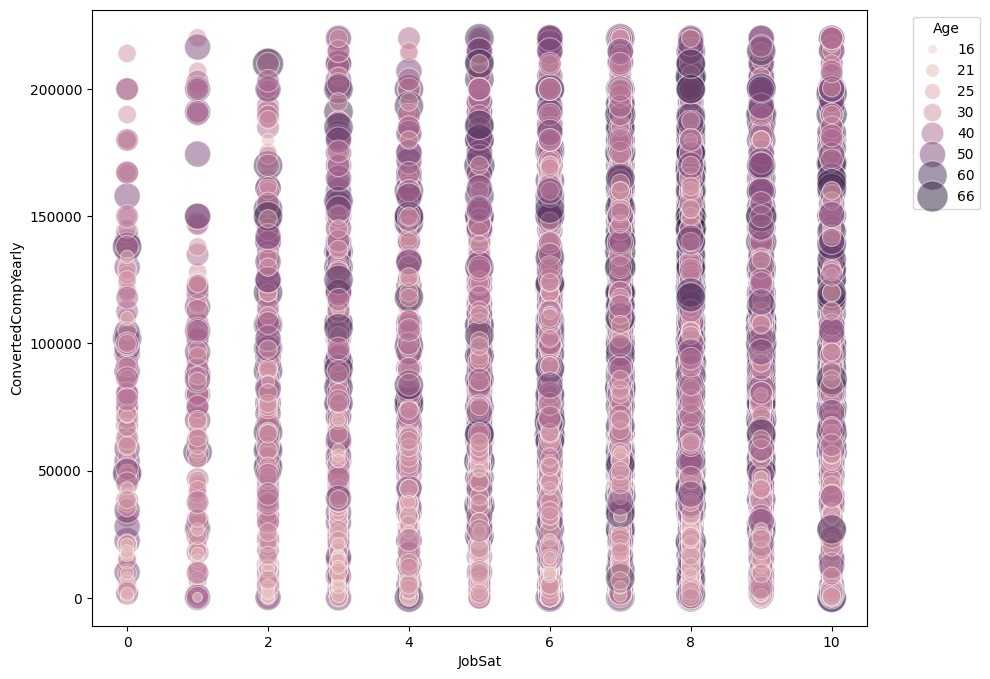

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bubble_data, x='JobSat', y='ConvertedCompYearly', size='Age', hue='Age', legend='full', alpha=0.5,sizes=(50,500))
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [8]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [9]:
bubble = df[['LanguageHaveWorkedWith', 'Age']].dropna()
bubble['Age'] = bubble['Age'].apply(get_age)
lang_expanded = bubble.assign(
    Language=bubble['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')
lang_expanded

LanguageHaveWorkedWith  Age  \
1      Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   40   
1      Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   40   
1      Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   40   
1      Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   40   
1      Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   40   
...                                                  ...  ...   
65436   C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript   21   
65436   C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript   21   
65436   C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript   21   
65436   C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript   21   
65436   C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript   21   

                      Language  
1      Bash/Shell (all shells)  
1                           Go  
1                     HTML/CSS  
1                         Java  
1                   JavaScript  
...                        ...  
65436                     Java  
65436               JavaScript  
65436                      PHP  
65436                   Python  
65436               TypeScript  

[322233 rows x 3 columns]

In [10]:
freq_data = lang_expanded.groupby(['Age', 'Language']).size().reset_index(name='Frequency')
freq_data

Age                 Language  Frequency
0     16                      Ada         25
1     16                     Apex          7
2     16                 Assembly        242
3     16  Bash/Shell (all shells)        746
4     16                        C        746
..   ...                      ...        ...
387   66               TypeScript         63
388   66                      VBA         96
389   66      Visual Basic (.Net)         63
390   66                   Zephyr          3
391   66                      Zig          5

[392 rows x 3 columns]

In [11]:
Q1 = freq_data['Frequency'].quantile(0.25)
Q3 = freq_data['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
freq_data = freq_data[(freq_data['Frequency'] >= lower) & (freq_data['Frequency'] <= upper)]
freq_data

Age                 Language  Frequency
0     16                      Ada         25
1     16                     Apex          7
2     16                 Assembly        242
3     16  Bash/Shell (all shells)        746
4     16                        C        746
..   ...                      ...        ...
387   66               TypeScript         63
388   66                      VBA         96
389   66      Visual Basic (.Net)         63
390   66                   Zephyr          3
391   66                      Zig          5

[336 rows x 3 columns]

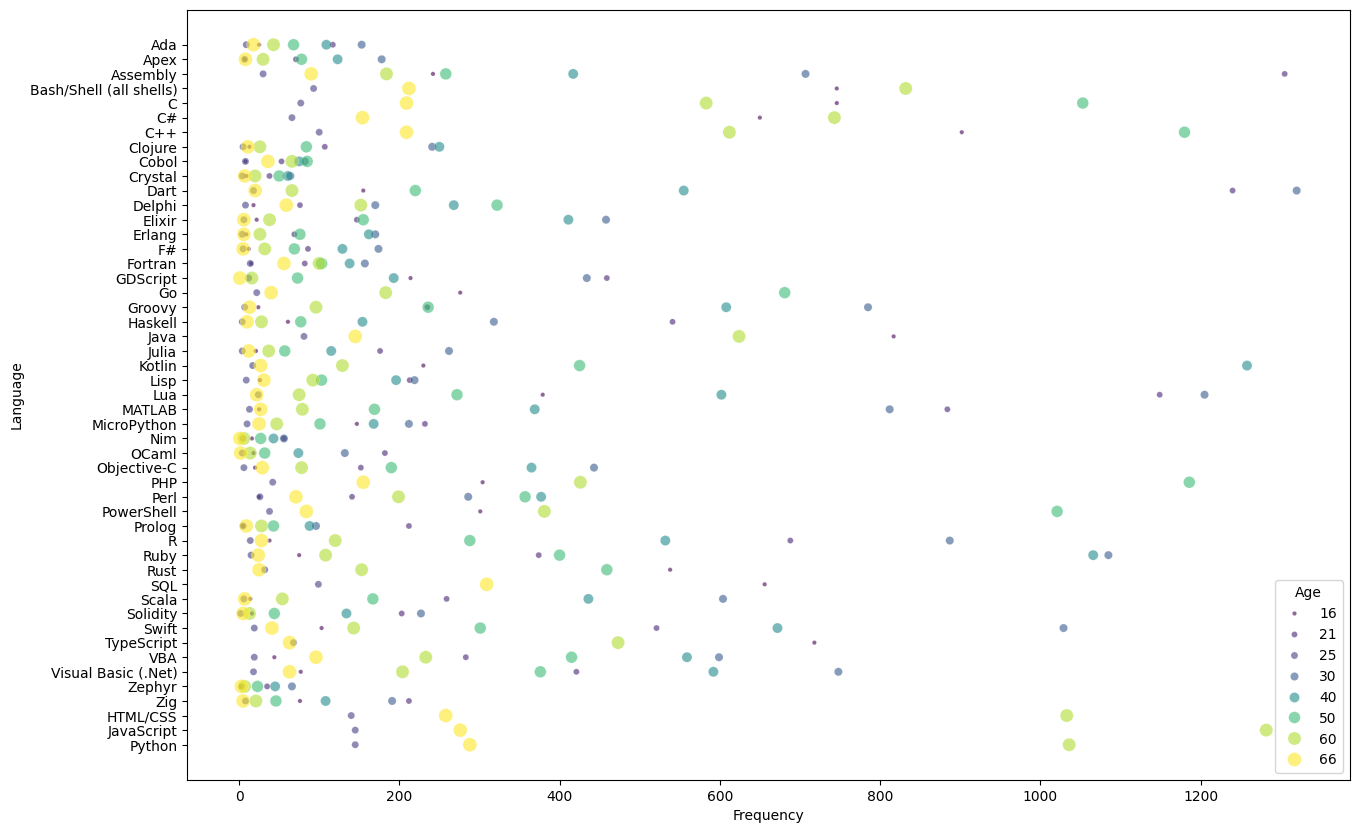

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_data,
    x='Frequency',
    y='Language',
    size='Age',
    hue='Age',
    palette='viridis',
    sizes=(10, 100),
    alpha=0.6,
    legend='full'
)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [13]:
db_data = df[['JobSat', 'DatabaseWantToWorkWith']].dropna()
db_expanded = db_data.assign(Database=db_data['DatabaseWantToWorkWith'].str.split(';').explode('Database'))
freq_db = db_expanded.groupby(['JobSat', 'Database']).size().reset_index(name='Frequency')

Q1 = freq_db['Frequency'].quantile(0.25)
Q3 = freq_db['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_db_clean = freq_db[(freq_db['Frequency'] >= lower_bound) & (freq_db['Frequency'] <= upper_bound)]
freq_db_clean

JobSat         Database  Frequency
0       0.0         BigQuery          2
1       0.0        Cassandra          5
2       0.0       Clickhouse          3
3       0.0  Cloud Firestore          2
4       0.0      Cockroachdb          2
..      ...              ...        ...
358    10.0           Presto          3
359    10.0          RavenDB          2
362    10.0        Snowflake         25
363    10.0             Solr          8
364    10.0         Supabase         34

[321 rows x 3 columns]

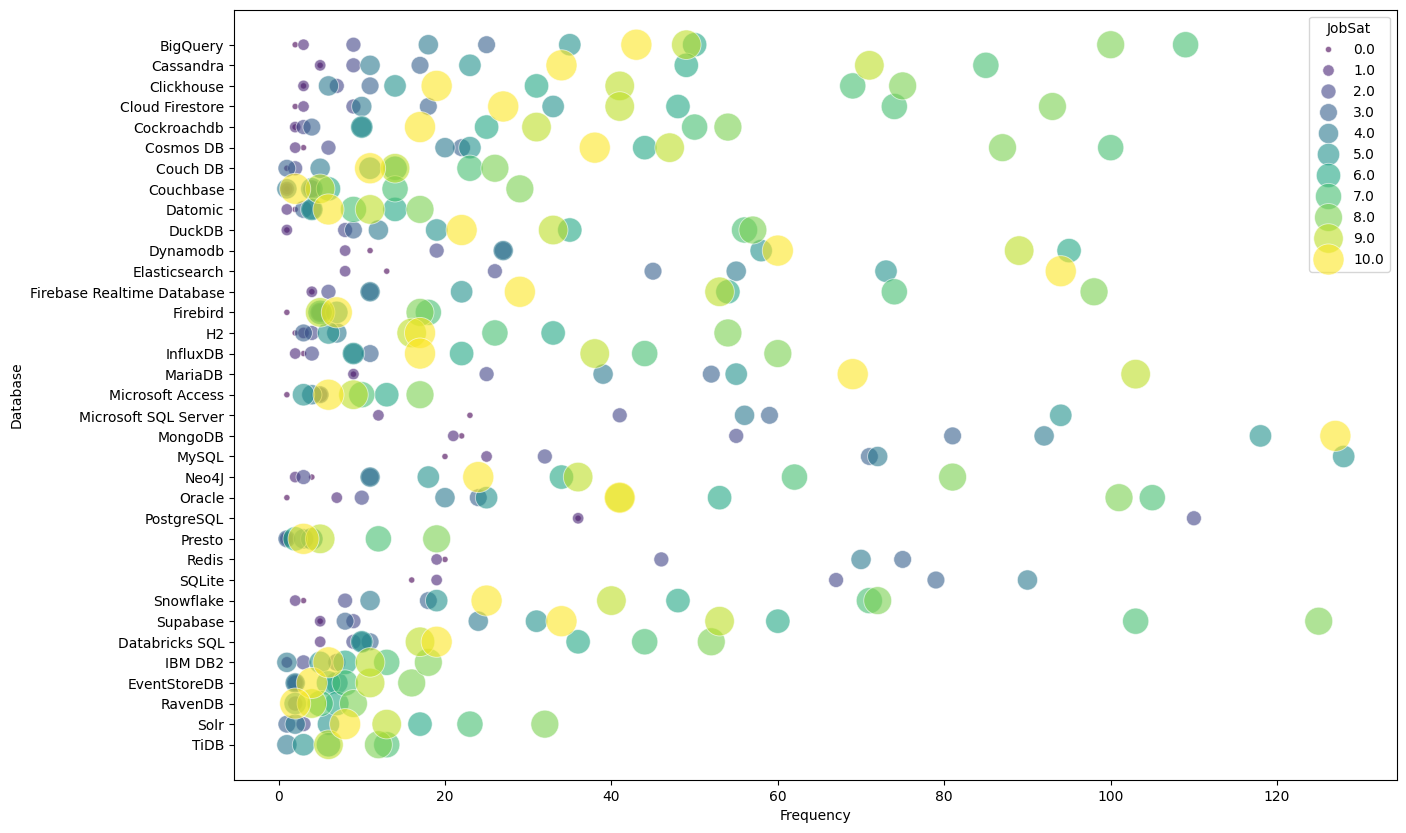

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_db_clean,
    x='Frequency',
    y='Database',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(20, 500),
    alpha=0.6,
    legend='full'
)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [15]:
dev_data = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()
dev_expanded = dev_data.assign(
    DevRole=dev_data['DevType'].str.split(';')
).explode('DevRole')

Q1 = dev_expanded['ConvertedCompYearly'].quantile(0.25)
Q3 = dev_expanded['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dev_clean = dev_expanded[(dev_expanded['ConvertedCompYearly'] >= lower_bound) &
                         (dev_expanded['ConvertedCompYearly'] <= upper_bound)]

dev_clean

DevType  ConvertedCompYearly  \
72     Data scientist or machine learning specialist               7322.0   
379    Data scientist or machine learning specialist              91295.0   
389                                          Student             110000.0   
392                              Engineering manager             161044.0   
398                            Developer, full-stack             195000.0   
...                                              ...                  ...   
41174                          Developer, full-stack               9571.0   
41175                          Developer, full-stack              15637.0   
41178                          Developer, full-stack               9711.0   
41184                                Project manager             170000.0   
41186                          Developer, full-stack              12000.0   

       JobSat                                        DevRole  
72       10.0  Data scientist or machine learning specialist  
379      10.0  Data scientist or machine learning specialist  
389      10.0                                        Student  
392       7.0                            Engineering manager  
398       5.0                          Developer, full-stack  
...       ...                                            ...  
41174     6.0                          Developer, full-stack  
41175     6.0                          Developer, full-stack  
41178     0.0                          Developer, full-stack  
41184     9.0                                Project manager  
41186     3.0                          Developer, full-stack  

[15421 rows x 4 columns]

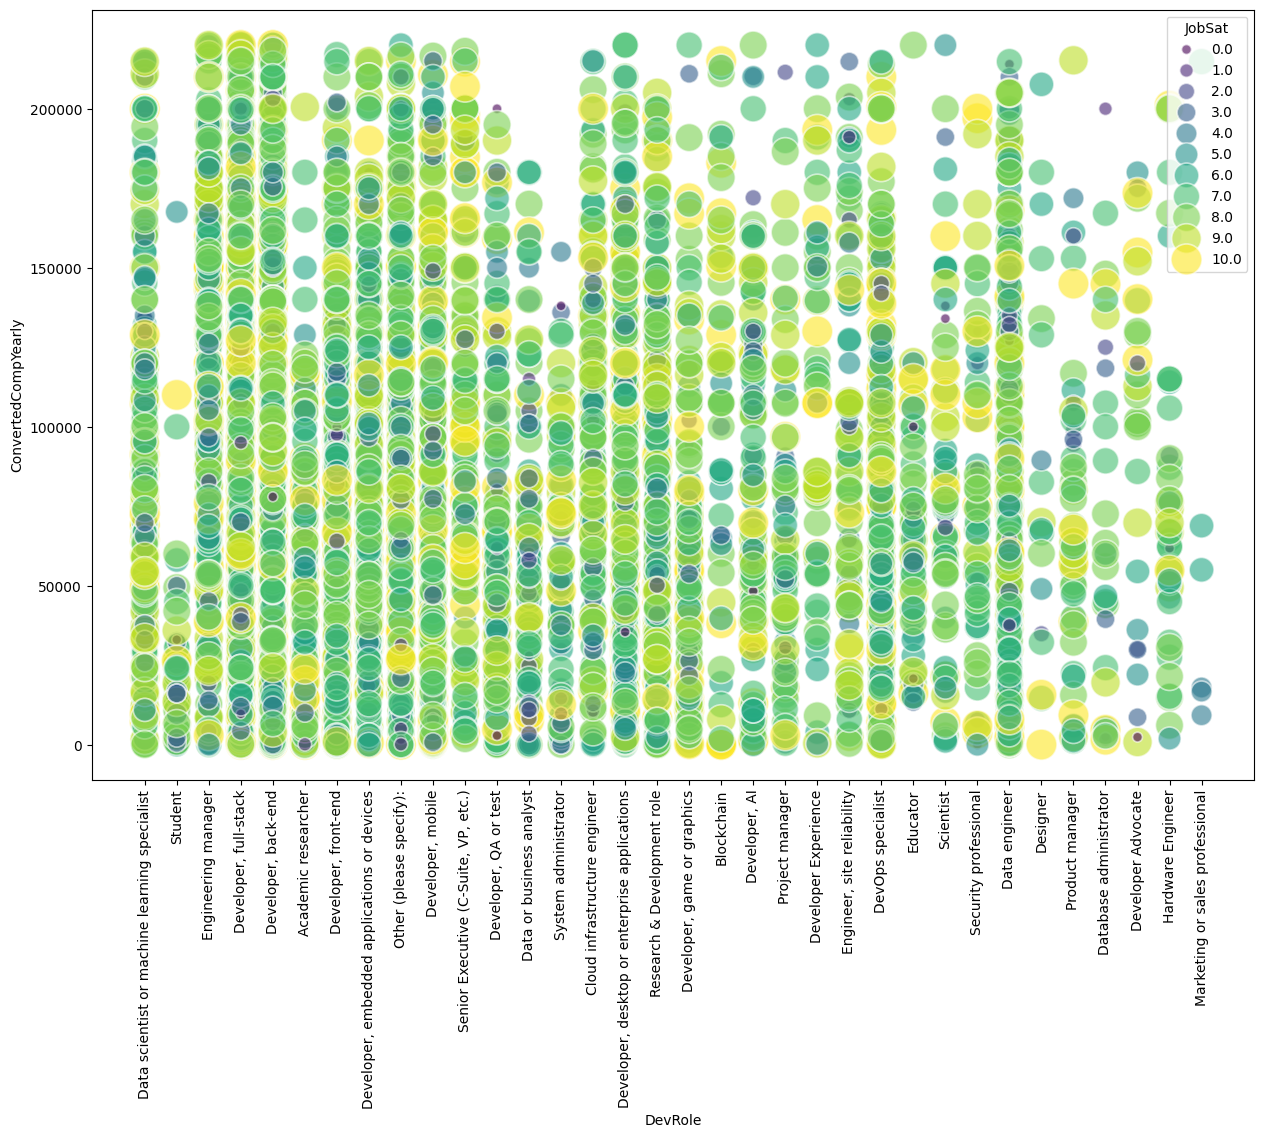

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=dev_clean,
    x='DevRole',
    y='ConvertedCompYearly',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.6,
    legend='full'
)
plt.xticks(rotation=90)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [17]:
tools_data = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()
tools_data['Age'] = tools_data['Age'].apply(get_age)

tools_expanded = tools_data.assign(Tool=tools_data['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
freq_tools = tools_expanded.groupby(['Age', 'Tool']).size().reset_index(name='Frequency')
freq_tools

Age                Tool  Frequency
0     16      Android Studio        479
1     16              BBEdit          5
2     16               CLion        169
3     16        Code::Blocks        126
4     16            DataGrip         47
..   ...                 ...        ...
274   66                 Vim        116
275   66       Visual Studio        221
276   66  Visual Studio Code        279
277   66            WebStorm         19
278   66               Xcode         76

[279 rows x 3 columns]

In [18]:
Q1 = freq_tools['Frequency'].quantile(0.25)
Q3 = freq_tools['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_tools_clean = freq_tools[(freq_tools['Frequency'] >= lower_bound) & (freq_tools['Frequency'] <= upper_bound)]
freq_tools_clean

Age                Tool  Frequency
0     16      Android Studio        479
1     16              BBEdit          5
2     16               CLion        169
3     16        Code::Blocks        126
4     16            DataGrip         47
..   ...                 ...        ...
274   66                 Vim        116
275   66       Visual Studio        221
276   66  Visual Studio Code        279
277   66            WebStorm         19
278   66               Xcode         76

[244 rows x 3 columns]

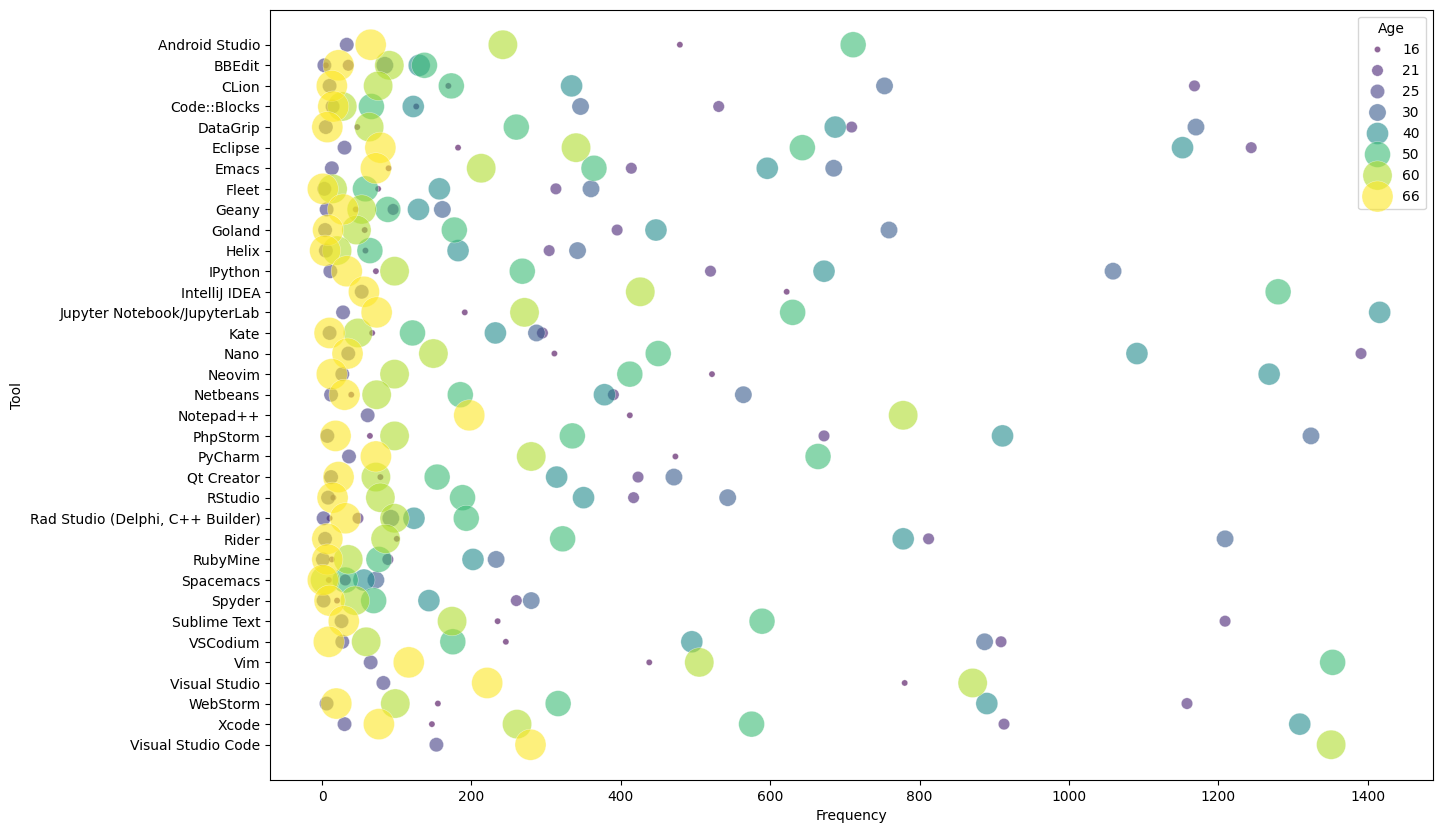

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_tools_clean,
    x='Frequency',
    y='Tool',
    size='Age',
    hue='Age',
    palette='viridis',
    sizes=(20, 500),
    alpha=0.6,
    legend='full'
)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [20]:
web_data = df[['JobSat', 'WebframeWantToWorkWith']].dropna()
web_expanded = web_data.assign(WebFramework=web_data['WebframeWantToWorkWith'].str.split(';')).explode('WebFramework')
freq_web = web_expanded.groupby(['JobSat', 'WebFramework']).size().reset_index(name='Frequency')
Q1 = freq_web['Frequency'].quantile(0.25)
Q3 = freq_web['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
freq_web_clean = freq_web[(freq_web['Frequency'] >= lower_bound) & (freq_web['Frequency'] <= upper_bound)]
freq_web_clean

JobSat  WebFramework  Frequency
0       0.0       ASP.NET         20
1       0.0  ASP.NET CORE         39
2       0.0       Angular         25
3       0.0     AngularJS          7
4       0.0         Astro         13
..      ...           ...        ...
391    10.0       Symfony         63
392    10.0        Vue.js        305
393    10.0     WordPress        118
394    10.0         Yii 2         18
395    10.0        jQuery        220

[359 rows x 3 columns]

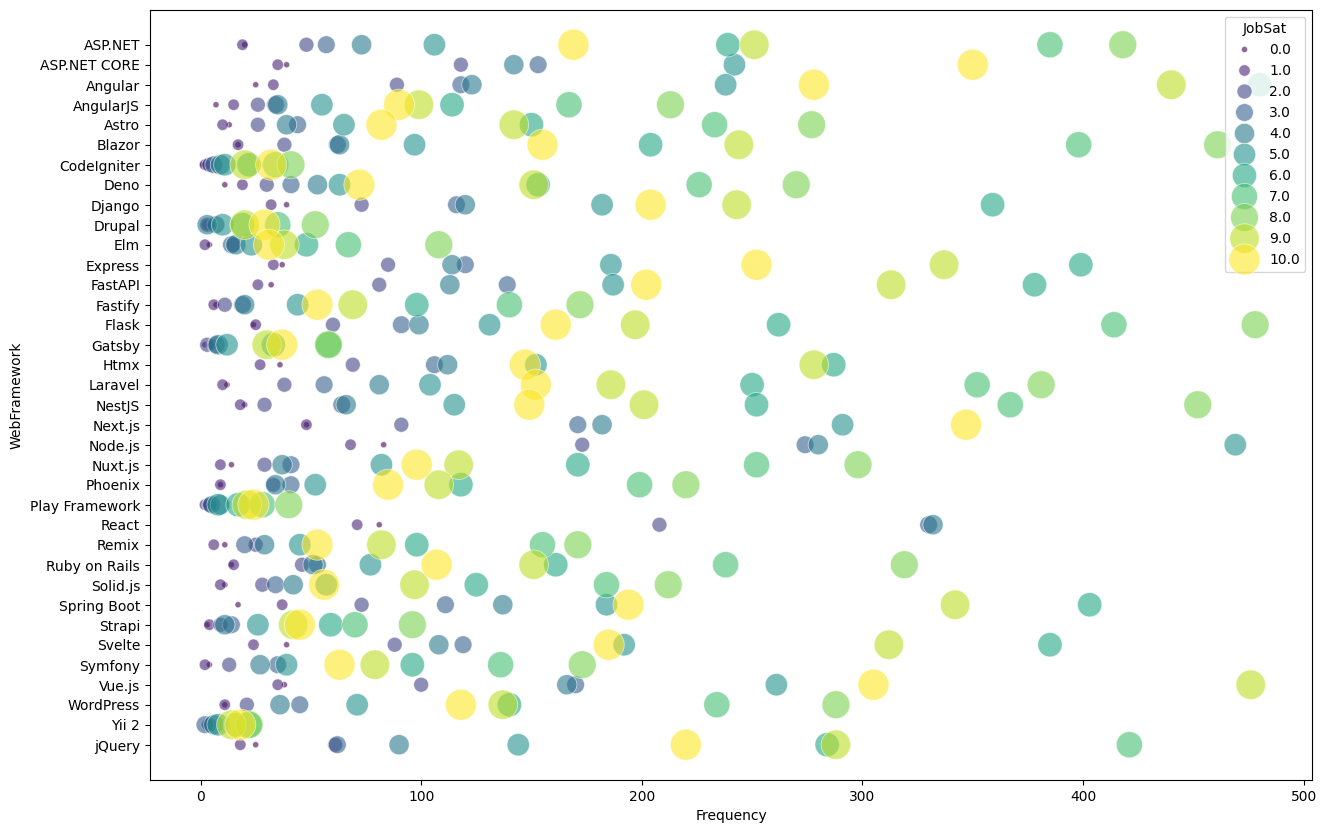

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=freq_web_clean,
    x='Frequency',
    y='WebFramework',
    size='JobSat',
    hue='JobSat',
    palette='viridis',
    sizes=(20, 500),
    alpha=0.6,
    legend='full'
)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [26]:
admired_data = df[['Country', 'LanguageAdmired']].dropna()
admired_expanded = admired_data.assign(Technology=admired_data['LanguageAdmired'].str.split(';')).explode('Technology')

freq_admired = admired_expanded.groupby(['Country', 'Technology']).size().reset_index(name='Frequency')

Q1 = freq_admired['Frequency'].quantile(0.25)
Q3 = freq_admired['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR

freq_admired_clean = freq_admired[(freq_admired['Frequency'] >= lower) & (freq_admired['Frequency'] <= upper)]
freq_admired_clean

Country               Technology  Frequency
0     Afghanistan                      Ada          7
1     Afghanistan                     Apex          3
2     Afghanistan                 Assembly          5
3     Afghanistan  Bash/Shell (all shells)         10
4     Afghanistan                        C          6
...           ...                      ...        ...
4582     Zimbabwe               PowerShell          5
4583     Zimbabwe                   Python         11
4584     Zimbabwe                     Rust          2
4585     Zimbabwe                      SQL         11
4586     Zimbabwe               TypeScript          8

[4093 rows x 3 columns]

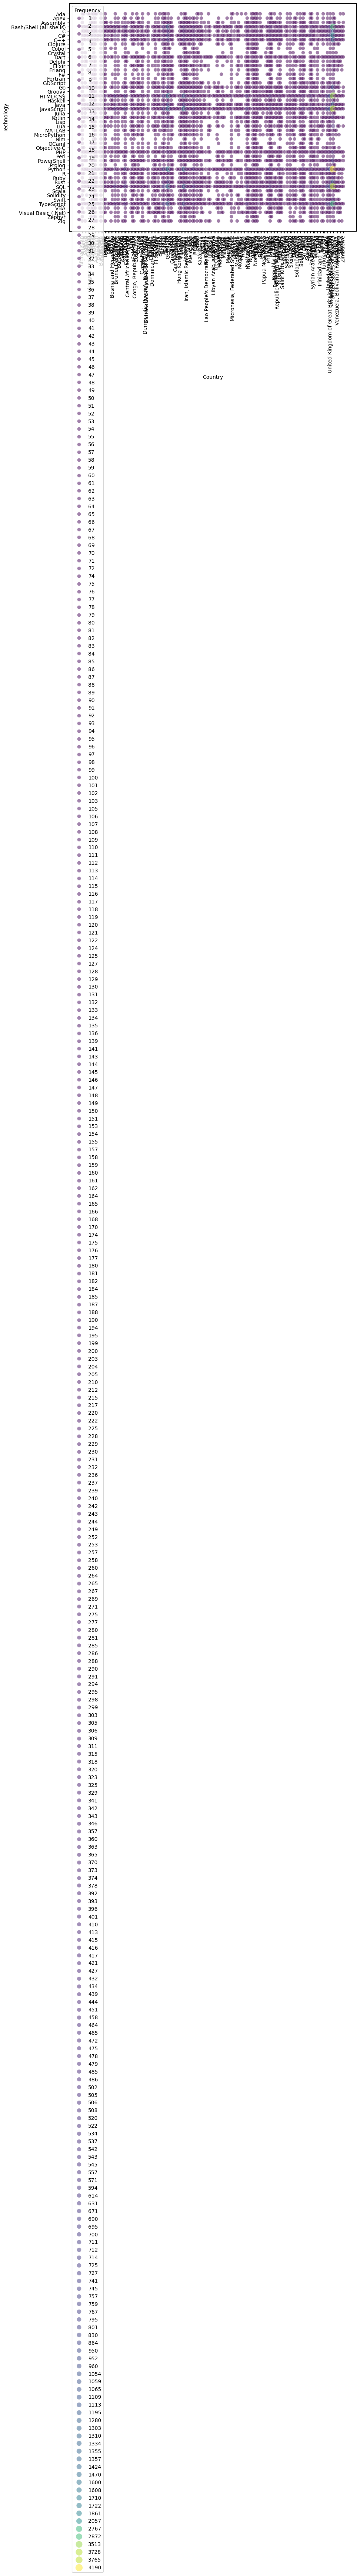

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=freq_admired,
                x='Country',
                y='Technology',
                size='Frequency',
                hue='Frequency',
                alpha=0.5,
                palette='viridis',
                sizes=(50,200),
                legend='full')
plt.xticks(rotation=90)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
